In [69]:
import string, numpy

import numpy as np

In [44]:
string= "Abib is a little man"

In [45]:
string.count('an')

1

In [6]:
lsalphabets=list(string.ascii_lowercase)

In [7]:
lsalphabets

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [10]:
text=str('''Deep learning is a field with intense computational requirements and the choice of your GPU will fundamentally determine your deep learning experience. With no GPU this might look like months of waiting for an experiment to finish, or running an experiment for a day or more only to see that the chosen parameters were off. With a good, solid GPU, one can quickly iterate over deep learning networks, and run experiments in days instead of months, hours instead of days, minutes instead of hours. So making the right choice when it comes to buying a GPU is critical. So how do you select the GPU which is right for you? This blog post will delve into that question and will lend you advice which will help you to make choice that is right for you.
TL;DR Having a fast GPU is a very important aspect when one begins to learn deep learning as this allows for rapid gain in practical experience which is key to building the expertise with which you will be able to apply deep learning to new problems. Without this rapid feedback it just takes too much time to learn from one’s mistakes and it can be discouraging and frustrating to go on with deep learning. With GPUs I quickly learned how to apply deep learning on a range of Kaggle competitions and I managed to earn second place in the Partly Sunny with a Chance of Hashtags Kaggle competition using a deep learning approach, where it was the task to predict weather ratings for a given tweet. In the competition I used a rather large two layered deep neural network with rectified linear units and dropout for regularization and this deep net fitted barely into my 6GB GPU memory.
Should I get multiple GPUs?
Excited by what deep learning can do with GPUs I plunged myself into multi-GPU territory by assembling a small GPU cluster with InfiniBand 40Gbit/s interconnect. I was thrilled to see if even better results can be obtained with multiple GPUs.
I quickly found that it is not only very difficult to parallelize neural networks on multiple GPUs efficiently, but also that the speedup was only mediocre for dense neural networks. Small neural networks could be parallelized rather efficiently using data parallelism, but larger neural networks like I used in the Partly Sunny with a Chance of Hashtags Kaggle competition received almost no speedup.
Later I ventured further down the road and I developed a new 8-bit compression technique which enables you to parallelize dense or fully connected layers much more efficiently with model parallelism compared to 32-bit methods.
However, I also found that parallelization can be horribly frustrating. I naively optimized parallel algorithms for a range of problems, only to find that even with optimized custom code parallelism on multiple GPUs does not work well, given the effort that you have to put in . You need to be very aware of your hardware and how it interacts with deep learning algorithms to gauge if you can benefit from parallelization in the first place.
Setup in my main computer: You can see three GXT Titan and an InfiniBand card. Is this a good setup for doing deep learning?
Since then parallelism support for GPUs is more common, but still far off from universally available and efficient. The only deep learning library which currently implements efficient algorithms across GPUs and across computers is CNTK which uses Microsoft’s special parallelization algorithms of 1-bit quantization (efficient) and block momentum (very efficient). With CNTK and a cluster of 96 GPUs you can expect a new linear speed of about 90x-95x. Pytorch might be the next library which supports efficient parallelism across machines, but the library is not there yet. If you want to parallelize on one machine then your options are mainly CNTK, Torch, Pytorch. These library yield good speedups (3.6x-3.8x) and have predefined algorithms for parallelism on one machine across up to 4 GPUs. There are other libraries which support parallelism, but these are either slow (like TensorFlow with 2x-3x) or difficult to use for multiple GPUs (Theano) or both.
If you put value on parallelism I recommend using either Pytorch or CNTK.
Using Multiple GPUs Without Parallelism
Another advantage of using multiple GPUs, even if you do not parallelize algorithms, is that you can run multiple algorithms or experiments separately on each GPU. You gain no speedups, but you get more information of your performance by using different algorithms or parameters at once. This is highly useful if your main goal is to gain deep learning experience as quickly as possible and also it is very useful for researchers, who want try multiple versions of a new algorithm at the same time.
This is psychologically important if you want to learn deep learning. The shorter the intervals for performing a task and receiving feedback for that task, the better the brain able to integrate relevant memory pieces for that task into a coherent picture. If you train two convolutional nets on separate GPUs on small datasets you will more quickly get a feel for what is important to perform well; you will more readily be able to detect patterns in the cross validation error and interpret them correctly. You will be able to detect  patterns which give you hints to what parameter or layer needs to be added, removed, or adjusted.
So overall, one can say that one GPU should be sufficient for almost any task but that multiple GPUs are becoming more and more important to accelerate your deep learning models. Multiple cheap GPUs are also excellent if you want to learn deep learning quickly. I personally have rather many small GPUs than one big one, even for my research experiments.
So what kind of accelerator should I get? NVIDIA GPU, AMD GPU, or Intel Xeon Phi?
NVIDIA’s standard libraries made it very easy to establish the first deep learning libraries in CUDA, while there were no such powerful standard libraries for AMD’s OpenCL. Right now, there are just no good deep learning libraries for AMD cards – so NVIDIA it is. Even if some OpenCL libraries would be available in the future I would stick with NVIDIA: The thing is that the GPU computing or GPGPU community is very large for CUDA and rather small for OpenCL. Thus, in the CUDA community, good open source solutions and solid advice for your programming is readily available.
Additionally, NVIDIA  went all-in with respect to deep learning even though deep learning was just in it infancy. This bet paid off.  While other companies now put money and effort behind deep learning they are still very behind due to their late start. Currently, using any software-hardware combination for deep learning other than NVIDIA-CUDA will lead to major frustrations.
In the case of Intel’s Xeon Phi it is advertised that you will be able to use standard C code and transform that code easily into accelerated Xeon Phi code. This feature might sounds quite interesting because you might think that you can rely on the vast resources of C code. However, in reality only very small portions of C code are supported so that this feature is not really useful and most portions of C that you will be able to run will be slow.
I worked on a Xeon Phi cluster with over 500 Xeon Phis and the frustrations with it had been endless. I could not run my unit tests because Xeon Phi MKL is not compatible with Python Numpy; I had to refactor large portions of code because the Intel Xeon Phi compiler is unable to make proper reductions for templates — for example for switch statements; I had to change my C interface because some C++11 features are just not supported by the Intel Xeon Phi compiler. All this led to frustrating refactorings which I had to perform without unit tests. It took ages. It was hell.
And then when my code finally executed, everything ran very slowly. There are bugs(?) or just problems in the thread scheduler(?) which cripple performance if the tensor sizes on which you operate change in succession. For example if you have differently sized fully connected layers, or dropout layers the Xeon Phi is slower than the CPU. I replicated this behavior in an isolated matrix-matrix multiplication example and sent it to Intel. I never heard back from them. So stay away from Xeon Phis if you want to do deep learning!
Fastest GPU for a given budget
TL;DR 
Your fist question might be what is the most important feature for fast GPU performance for deep learning: Is it cuda cores? Clock speed? RAM size?
It is neither of these, but the most important feature for deep learning performance is memory bandwidth.
In short: GPUs are optimized for memory bandwidth while sacrificing for memory access time (latency). CPUs design to the the exact opposite: CPUs can do quick computations if small amounts of memory are involved for example multiplying a few numbers (3*6*9), but for operations on large amounts of memory like matrix multiplication (A*B*C) they are slow. GPUs excel at problems that involve large amounts of memory due to their memory bandwidth. Of course there are more intricate differences between GPUs and CPUs, and if you are interested why GPUs are such a good match for deep learning you can read more about it in my quora answer about this very question.
So if you want to buy a fast GPU, first and foremost look at the bandwidth of that GPU.''')



In [56]:
count_array= numpy.zeros((26, 2))
for i, alpha in enumerate(lsalphabets):
    count_array[i,0], count_array[i,1] =i, text.count(alpha)


In [17]:
len(text)

9307

In [28]:
prob=numpy.array(prob_list)/len(text)

array([ 0.05866552,  0.01095949,  0.02267111,  0.02492747,  0.09261846,
        0.01998496,  0.01407543,  0.03072956,  0.05769851,  0.00075212,
        0.00440529,  0.0417965 ,  0.02213388,  0.05232621,  0.05963253,
        0.02073708,  0.00161169,  0.053723  ,  0.04233373,  0.06693886,
        0.02503492,  0.00644676,  0.01300097,  0.00311593,  0.01708392,
        0.00171914])

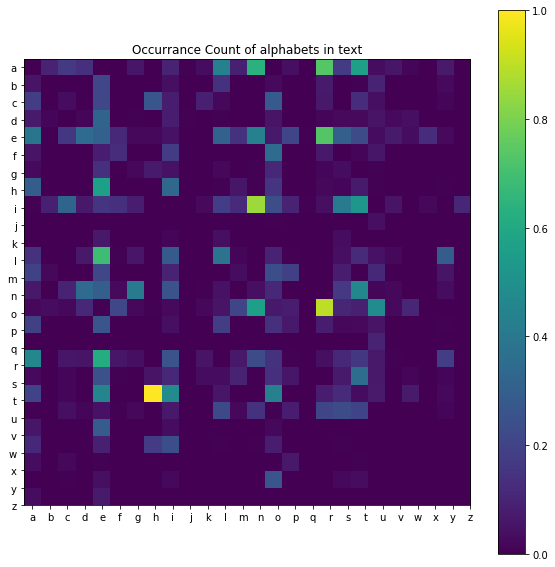

In [102]:
import matplotlib.pyplot as plt
import matplotlib.colors

fig1 = plt.figure(figsize=(10,10))
ax2 = fig1.add_subplot(111)
plt.xticks(np.linspace(0, 50),lsalphabets)
plt.yticks(np.linspace(0, 50),lsalphabets)
ax2.imshow(count_array, interpolation='none')
ax2.set_title('Occurrance Count of alphabets in text')

cmap = plt.cm.viridis
#norm = matplotlib.colors.Normalize(vmin=1.5, vmax=4.5)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
fig1.colorbar(sm)

plt.show()

In [42]:
!conda info textract

In [83]:
count_array.max()

862.0

In [92]:
relcount_array= numpy.zeros((26, 26))
for i, alpha in enumerate(lsalphabets):
    for j, beta in enumerate(lsalphabets):
        relcount_array[i,j], relcount_array[i,j] =i, text.count(alpha+beta)



In [88]:
for alpha in lsalphabets:
    for beta in lsalphabets:
        print(alpha+beta)

aa
ab
ac
ad
ae
af
ag
ah
ai
aj
ak
al
am
an
ao
ap
aq
ar
as
at
au
av
aw
ax
ay
az
ba
bb
bc
bd
be
bf
bg
bh
bi
bj
bk
bl
bm
bn
bo
bp
bq
br
bs
bt
bu
bv
bw
bx
by
bz
ca
cb
cc
cd
ce
cf
cg
ch
ci
cj
ck
cl
cm
cn
co
cp
cq
cr
cs
ct
cu
cv
cw
cx
cy
cz
da
db
dc
dd
de
df
dg
dh
di
dj
dk
dl
dm
dn
do
dp
dq
dr
ds
dt
du
dv
dw
dx
dy
dz
ea
eb
ec
ed
ee
ef
eg
eh
ei
ej
ek
el
em
en
eo
ep
eq
er
es
et
eu
ev
ew
ex
ey
ez
fa
fb
fc
fd
fe
ff
fg
fh
fi
fj
fk
fl
fm
fn
fo
fp
fq
fr
fs
ft
fu
fv
fw
fx
fy
fz
ga
gb
gc
gd
ge
gf
gg
gh
gi
gj
gk
gl
gm
gn
go
gp
gq
gr
gs
gt
gu
gv
gw
gx
gy
gz
ha
hb
hc
hd
he
hf
hg
hh
hi
hj
hk
hl
hm
hn
ho
hp
hq
hr
hs
ht
hu
hv
hw
hx
hy
hz
ia
ib
ic
id
ie
if
ig
ih
ii
ij
ik
il
im
in
io
ip
iq
ir
is
it
iu
iv
iw
ix
iy
iz
ja
jb
jc
jd
je
jf
jg
jh
ji
jj
jk
jl
jm
jn
jo
jp
jq
jr
js
jt
ju
jv
jw
jx
jy
jz
ka
kb
kc
kd
ke
kf
kg
kh
ki
kj
kk
kl
km
kn
ko
kp
kq
kr
ks
kt
ku
kv
kw
kx
ky
kz
la
lb
lc
ld
le
lf
lg
lh
li
lj
lk
ll
lm
ln
lo
lp
lq
lr
ls
lt
lu
lv
lw
lx
ly
lz
ma
mb
mc
md
me
mf
mg
mh
mi
mj
mk
ml
mm
mn
mo
mp
mq
mr
ms
mt
mu
m

In [91]:
my_xticks = ['John','Arnold','Mavis','Matt']
plt.xticks(x, my_xticks)

(26, 26)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors

fig1 = plt.figure(figsize=(10,10))
ax2 = fig1.add_subplot(111)
ax2.imshow(np.transpose(count_array), interpolation='none')
ax2.set_title('Count of alphabets in text')

cmap = plt.cm.viridis
#norm = matplotlib.colors.Normalize(vmin=1.5, vmax=4.5)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
fig1.colorbar(sm)

plt.show()